In [1]:
#Importar librerias tipicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [2]:
#Leyendo data
data=pd.read_csv("Cliente_Segmentacion_v0.csv")

In [3]:
#Vistazo a data
print(data.head())
print(data.shape)

   Id  Edad  NivEdu  AnhosEmpleo  IngresoMensual  DeudaTarjeta  OtraDeuda  \
0   1    41       2            6              19         0.124      1.073   
1   2    47       1           26             100         4.582      8.218   
2   3    33       2           10              57         6.111      5.802   
3   4    29       2            4              19         0.681      0.516   
4   5    47       1           31             253         9.308      8.908   

   Quiebra Direccion  RatioIngresoDeuda  
0        0    NBA001                6.3  
1        0    NBA021               12.8  
2        1    NBA013               20.9  
3        0    NBA009                6.3  
4        0    NBA008                7.2  
(850, 10)


In [4]:
data.corr()
#coeficiente de correlacion de Pearson: [-1,+1]

,Id,Edad,NivEdu,AnhosEmpleo,IngresoMensual,DeudaTarjeta,OtraDeuda,Quiebra,RatioIngresoDeuda
Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.039396,0.014039
Edad,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.025021,0.008240
NivEdu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.029175,0.008053
AnhosEmpleo,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.081579,-0.033625
IngresoMensual,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,0.019894,-0.035585
DeudaTarjeta,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.134277,0.514971
OtraDeuda,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.077146,0.572545
Quiebra,-0.039396,-0.025021,0.029175,-0.081579,0.019894,0.134277,0.077146,1.000000,0.160648
RatioIngresoDeuda,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.160648,1.000000


# Los pares seleccionados son:
### OtraDeuda vs DeudaTarjeta	con Factor= 0,644955 
### IngresoMensual vs AnhosEmpleo	con Factor= 0,625093 
### IngresoMensual vs OtraDeuda	con Factor= 0,603356
### RatioIngresoDeuda vs OtraDeuda	con Factor= 0,572545
### AnhosEmpleo vs Edad con Factor= 0,554241

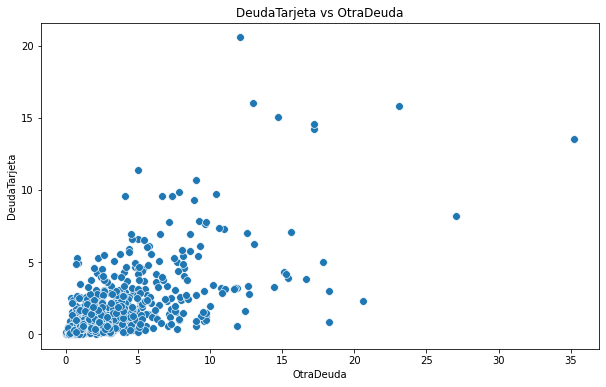

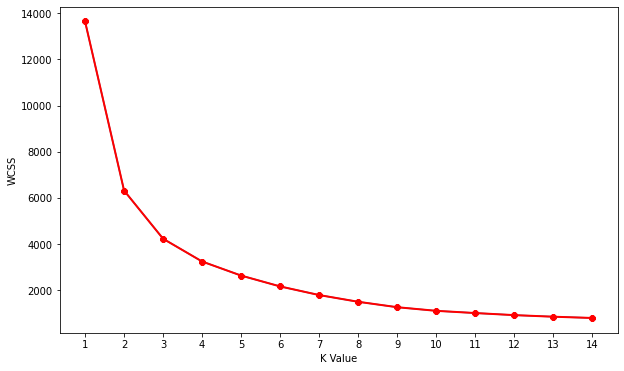

In [5]:
#Primero probaremos Annual Income y Spending score
df1=data[["Id",	"Edad",	"NivEdu","AnhosEmpleo","IngresoMensual","DeudaTarjeta","OtraDeuda","Quiebra","RatioIngresoDeuda"]]
X=df1[["OtraDeuda","DeudaTarjeta"]]
#input data
X.head()
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'OtraDeuda',y = 'DeudaTarjeta',  data = X  ,s = 60 )
plt.xlabel('OtraDeuda')
plt.ylabel('DeudaTarjeta') 
plt.title('DeudaTarjeta vs OtraDeuda')
plt.show()

#Importing KMeans from sklearn
from sklearn.cluster import KMeans
#Ver mejor clustering
wcss=[]
for i in range(1,15): # va de 1 a 15 clusters
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#Curva elbow
plt.figure(figsize=(10,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

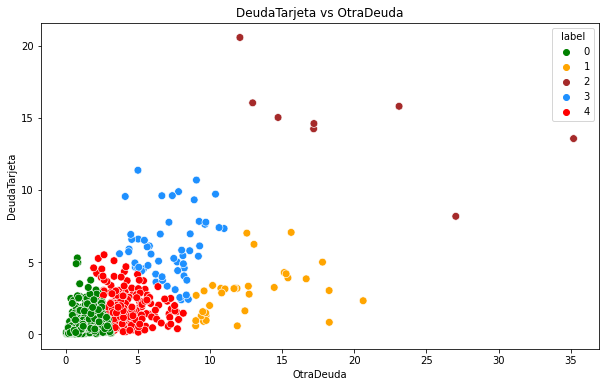

In [6]:
#Usando 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
#Un dataframe con campo clustering
df1.head()
#Scatterplot de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'OtraDeuda',y = 'DeudaTarjeta',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('OtraDeuda')
plt.ylabel('DeudaTarjeta') 
plt.title('DeudaTarjeta vs OtraDeuda')
plt.show()

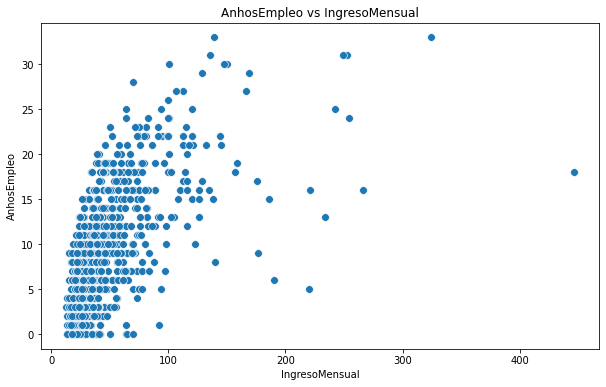

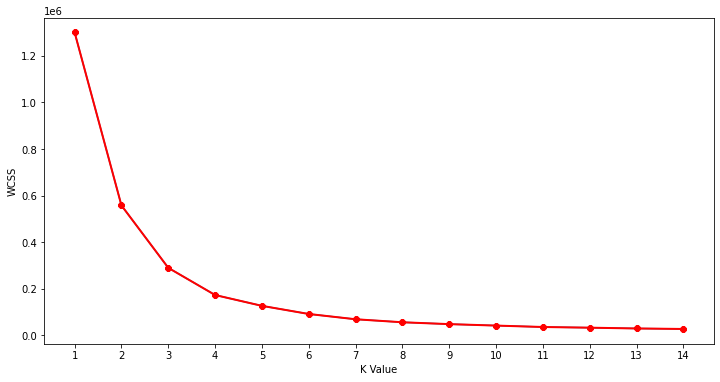

In [15]:
###################################################################################
X=df1[["IngresoMensual","AnhosEmpleo"]]
#input data
X.head()
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IngresoMensual',y = 'AnhosEmpleo',  data = X  ,s = 60 )
plt.xlabel('IngresoMensual')
plt.ylabel('AnhosEmpleo') 
plt.title('AnhosEmpleo vs IngresoMensual')
plt.show()

#Ver mejor clustering
wcss=[]
for i in range(1,15): # va de 1 a 10 clusters
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Curva elbow
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

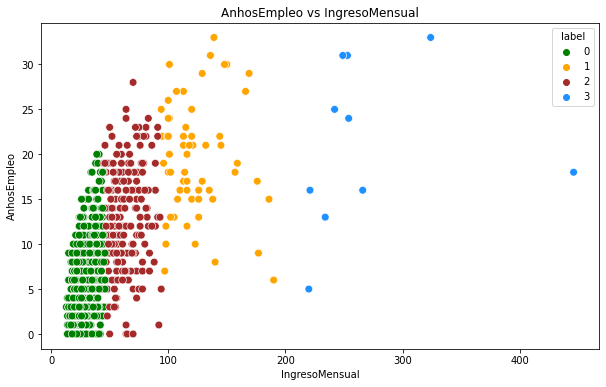

In [8]:
#Usando 4 clusters
km1=KMeans(n_clusters=4)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
#Un dataframe con campo clustering
df1.head()
#Scatterplot de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IngresoMensual',y = 'AnhosEmpleo',hue="label",  
                 palette=['green','orange','brown','dodgerblue'], legend='full',data = df1  ,s = 60 )
plt.xlabel('IngresoMensual')
plt.ylabel('AnhosEmpleo') 
plt.title('AnhosEmpleo vs IngresoMensual')
plt.show()

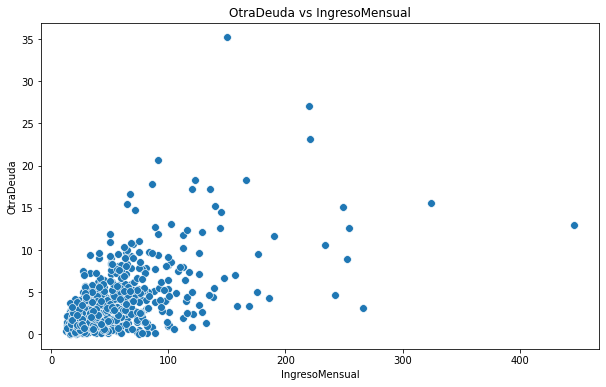

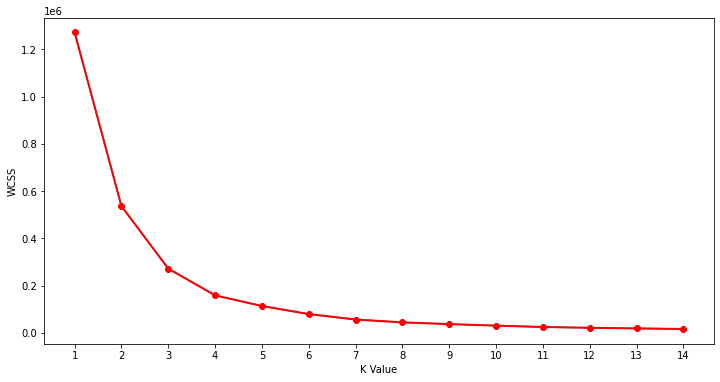

In [16]:
X=df1[["IngresoMensual","OtraDeuda"]]
#input data
X.head()
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IngresoMensual',y = 'OtraDeuda',  data = X  ,s = 60 )
plt.xlabel('IngresoMensual')
plt.ylabel('OtraDeuda') 
plt.title('OtraDeuda vs IngresoMensual')
plt.show()

#Ver mejor clustering
wcss=[]
for i in range(1,15): # va de 1 a 10 clusters
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Curva elbow
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

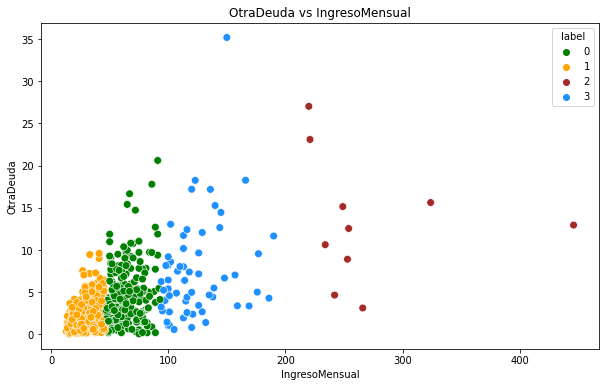

In [10]:
#Usando 4 clusters
km1=KMeans(n_clusters=4)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
#Un dataframe con campo clustering
df1.head()
#Scatterplot de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IngresoMensual',y = 'OtraDeuda',hue="label",  
                 palette=['green','orange','brown','dodgerblue'], legend='full',data = df1  ,s = 60 )
plt.xlabel('IngresoMensual')
plt.ylabel('OtraDeuda') 
plt.title('OtraDeuda vs IngresoMensual')
plt.show()

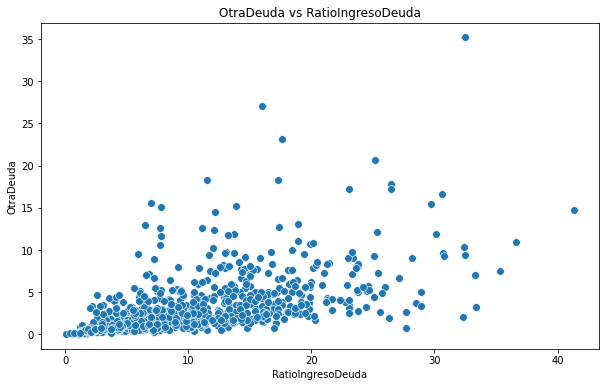

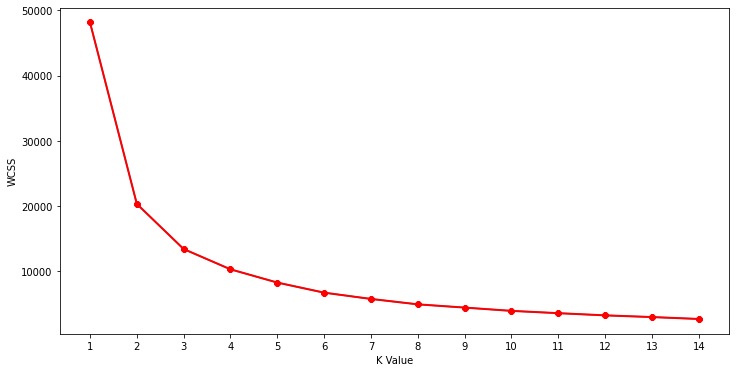

In [17]:
X=df1[["RatioIngresoDeuda","OtraDeuda"]]
#input data
X.head()
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'RatioIngresoDeuda',y = 'OtraDeuda',  data = X  ,s = 60 )
plt.xlabel('RatioIngresoDeuda')
plt.ylabel('OtraDeuda') 
plt.title('OtraDeuda vs RatioIngresoDeuda')
plt.show()

#Ver mejor clustering
wcss=[]
for i in range(1,15): # va de 1 a 10 clusters
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Curva elbow
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

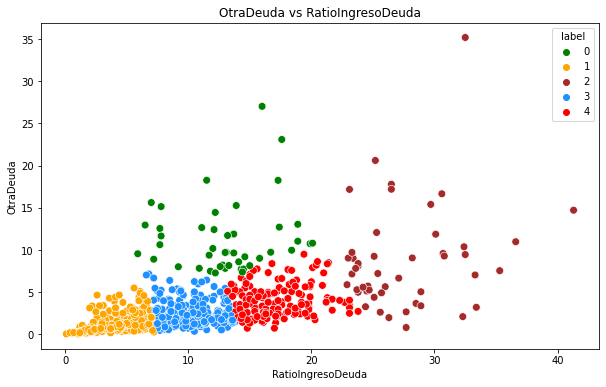

In [12]:
#Usando 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
#Un dataframe con campo clustering
df1.head()
#Scatterplot de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'RatioIngresoDeuda',y = 'OtraDeuda',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('RatioIngresoDeuda')
plt.ylabel('OtraDeuda') 
plt.title('OtraDeuda vs RatioIngresoDeuda')
plt.show()

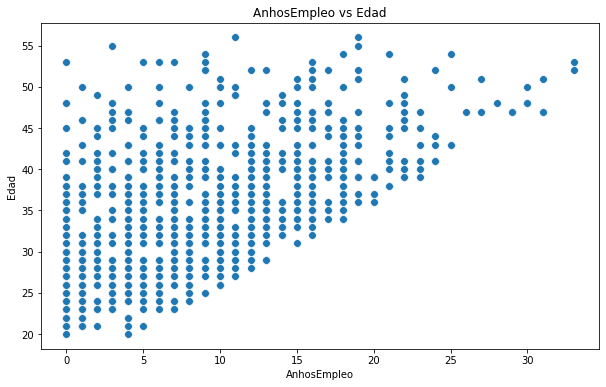

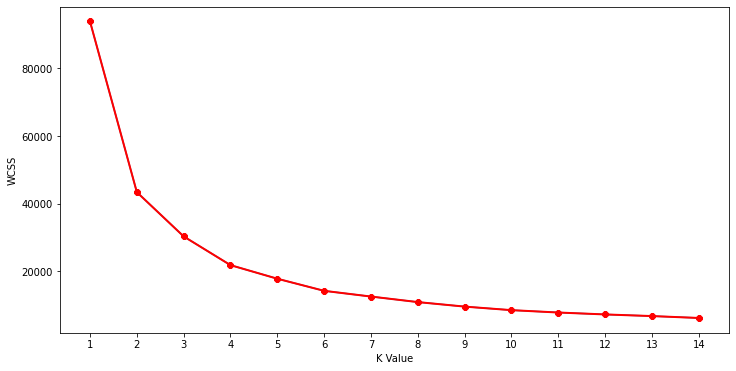

In [18]:
X=df1[["AnhosEmpleo","Edad"]]
#input data
X.head()
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AnhosEmpleo',y = 'Edad',  data = X  ,s = 60 )
plt.xlabel('AnhosEmpleo')
plt.ylabel('Edad') 
plt.title('AnhosEmpleo vs Edad')
plt.show()

#Ver mejor clustering
wcss=[]
for i in range(1,15): # va de 1 a 10 clusters
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Curva elbow
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

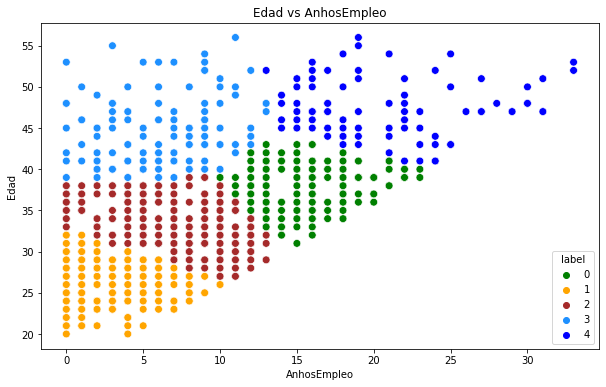

In [14]:
#Usando 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
#Un dataframe con campo clustering
df1.head()
#Scatterplot de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AnhosEmpleo',y = 'Edad',hue="label",  
                 palette=['green','orange','brown','dodgerblue','blue'], legend='full',data = df1  ,s = 60 )
plt.xlabel('AnhosEmpleo')
plt.ylabel('Edad') 
plt.title('Edad vs AnhosEmpleo')
plt.show()

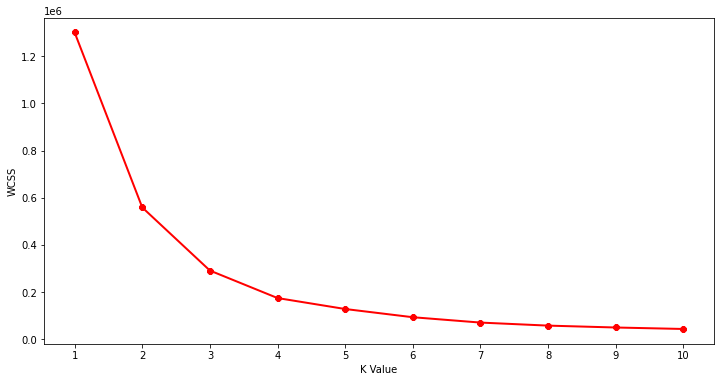

In [19]:
###############################################################################
# Respuesta 4
###############################################################################
#Ahora usando 3 features
df2=data[["Id",	"Edad",	"NivEdu","AnhosEmpleo","IngresoMensual","DeudaTarjeta","OtraDeuda","Quiebra","RatioIngresoDeuda"]]
X2=df1[["IngresoMensual","AnhosEmpleo","NivEdu"]]
#Repetimos el mismo proceso
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [23]:
#Nuevamenete elegimos K=5
km2 = KMeans(n_clusters=5)
y2 = km2.fit_predict(X2)
df2["label"] = y2
#La data con labels
df2.head()

,Id,Edad,NivEdu,AnhosEmpleo,IngresoMensual,DeudaTarjeta,OtraDeuda,Quiebra,RatioIngresoDeuda,label
0,1,41,2,6,19,0.124,1.073,0,6.3,1
1,2,47,1,26,100,4.582,8.218,0,12.8,0
2,3,33,2,10,57,6.111,5.802,1,20.9,3
3,4,29,2,4,19,0.681,0.516,0,6.3,1
4,5,47,1,31,253,9.308,8.908,0,7.2,2


In [ ]:
# import numpy as np
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook

# # Call once to configure Bokeh to display plots inline in the notebook.
# output_notebook()

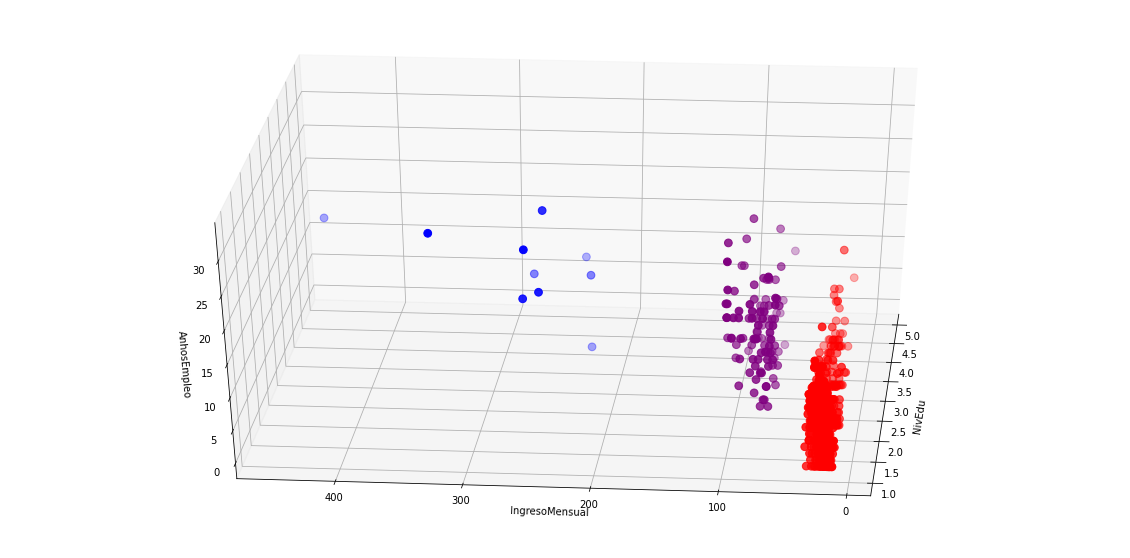

In [25]:
# %matplotlib notebook
# %matplotlib inline
#Se realiza un plot 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.NivEdu[df2.label == 0], df2["IngresoMensual"][df2.label == 0], df2["AnhosEmpleo"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.NivEdu[df2.label == 1], df2["IngresoMensual"][df2.label == 1], df2["AnhosEmpleo"][df2.label == 1], c='red', s=60)
ax.scatter(df2.NivEdu[df2.label == 2], df2["IngresoMensual"][df2.label == 2], df2["AnhosEmpleo"][df2.label == 2], c='blue', s=60)
#ax.scatter(df2.NivEdu[df2.label == 3], df2["IngresoMensual)"][df2.label == 3], df2["AnhosEmpleo"][df2.label == 3], c='green', s=60)
#ax.scatter(df2.NivEdu[df2.label == 4], df2["IngresoMensual"][df2.label == 4], df2["AnhosEmpleo"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("NivEdu")
plt.ylabel("IngresoMensual")
ax.set_zlabel('AnhosEmpleo')
plt.show()
##["IngresoMensual","AnhosEmpleo","NivEdu"]

In [27]:
# EXTRA: Plots interactivos
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [28]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [29]:
# data['labels'] =  labels
# df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
##["IngresoMensual","AnhosEmpleo","NivEdu"]
enable_plotly_in_cell()
trace1 = go.Scatter3d(
    x= df2['NivEdu'],
    y= df2['AnhosEmpleo'],
    z= df2['IngresoMensual'],
    mode='markers',
     marker=dict(
        color = df2['label'], 
        size= 10,
        line=dict(
            color= df2['label'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Grafico',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'NivEdu'),
            yaxis = dict(title  = 'AnhosEmpleo'),
            zaxis = dict(title  = 'IngresoMensual')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Output hidden; open in https://colab.research.google.com to view.